# 27-100 Computational MSE Lab: Diffusion!
Welcome to the computational lab! In these exercises, we'll explore diffusion at both the atomistic and continuum lengthscales. As you've seen by now, one of the hallmarks of "MSE thinking" is connecting across lengthscales – for example, understanding dislocation motion and how it leads to plastic deformation. We've talked some in lecture about atomistic mechanisms of diffusion (e.g. via vacancies) as well as how we describe it in a continuum setting (Fick's Laws). Here we'll explore how those ideas are connected to each other through a series of **computational experiments** that you'll be guided through. You will not need to write any code yourself (though if you're curious, you'll be able to see the code that's being run).

You'll also be able to see how such **computational experiments** can be very analogous to lab-based ones...keep this in mind as you work, and think about how computation can be similar to/different from experiments, and how the two approaches might complement each other!

## What is this thing I'm reading?
This is a Jupyter notebook, an environment for **literate programming**, where formatted text (like this) can be interspersed with interactively runnable code cells (like the ones immediately below this). Jupyter comes from Ju (Julia) + Py (Python) + R, and as the name suggests, it can run code in all three of these languages. This particular notebook is running Julia.

To run a cell, simply select it by clicking on it and use <kbd>Shift</kbd> + <kbd>Enter</kbd> to execute the code. You'll need to execute each cell for things to work properly – many of them will create an interactive thing for you to work with, for example to paste data into for processing. You should not need to change any of the code itself directly!

Go ahead and run these first two cells below now – they will set up the computational environment so that all the needed packages will be loaded. When they've executed successfully, a number should appear to the left.

In [ ]:
import Pkg; Pkg.activate(".")

In [ ]:
using CSV
using DataFrames
using Statistics
using LinearAlgebra
using WGLMakie
Makie.inline!(true)
WGLMakie.activate!()


# Atomistic-Scale Diffusion: Molecular Dynamics
We'll start by investigating diffusion at the atomistic scale, in a way that only simulations are capable of (at least right now)...by tracking positions of thousands of individual atoms at once! This uses a technique called **molecular dynamics**, where we choose a model interatomic potential (in this case, Lennard-Jones, which you explored a bit on homework 5) and just run Newton's Laws between all pairs of particles to generate atomic trajectories.

<div class="alert alert-block alert-info">
<b>A note about units:</b>
    
All the quantities we'll work with in this section are in <i>Lennard-Jones units</i>, meaning that we've nondimensionalized according to the LJ parameters $\sigma$ (a distance) and $\epsilon$ (an energy), as well as the mass $m$ of the particles we are modeling. For example, time is in units of $\sqrt{\frac{m\sigma^2}{\epsilon}}$ (you can check for yourself that the dimensions work out here!)
</div>

We'll use a nice online two-dimensional MD engine that you can access [HERE](https://physics.weber.edu/schroeder/md/). Start by opening it up and playing around a bit to familiarize yourself with the interface (if you explore any of the Presets, just refresh the page at the end to get to the default setup, which is what we'll be using).

In an atomistic simulation like this, we can extract diffusion coefficients by tracking the **mean squared displacement (MSD)** of atoms across the system trajectory, and the diffusion coefficient is related to the slope of MSD vs. time: 

$$\mathrm{MSD} = 2nDt$$

(where $n$ is the number of dimensions, so for the 2D case we'll be playing with here, $\mathrm{MSD}=4Dt$)

But things down at the atomistic level are _noisy_, so to get good estimates, we need LOTS of data! We'll explore a few different ways to collect a LOT of data here...

## Approach 1: tracking individual atoms
One way to collect a LOT of data is to collect the locations of a single particle at many, many time points. Let's try that first.

First, we need to set up our experiment. We want to get our box to contain **2125 atoms and be at a nondimensional temperature of 0.55**. It's not completely trivial to fill up the box that far, and there are a number of different ways to do it. I'll demonstrate one during the lab session, which essentially involves repeatedly "freezing" the box, dragging up the number of atoms slider as far as it will go, and repeating. Then at the end, use the "Faster" (and/or "Slower" and 1% adjustment buttons) to get the temperature to the right level.

Once you get to that density and temperature, we need to set things up to be able to collect data. Pause the simulation (top left button) if it's running, and do the following:
1. Click the <kbd>↓Data↓</kbd> button on the bottom right of the window to expand the data collection pane.
2. Change "Data type" to "Selected Atom" so we can write full trajectories for one atom at a time.
3. Change the "Mouse/touch" dropdown near the top to "Select" and click on an atom near the middle of the box.
4. Change the "Auto interval" dropdown (near the bottom of the window) to 10.

The image below highlights elements of the interface you'll need to interact with/pay attention to:

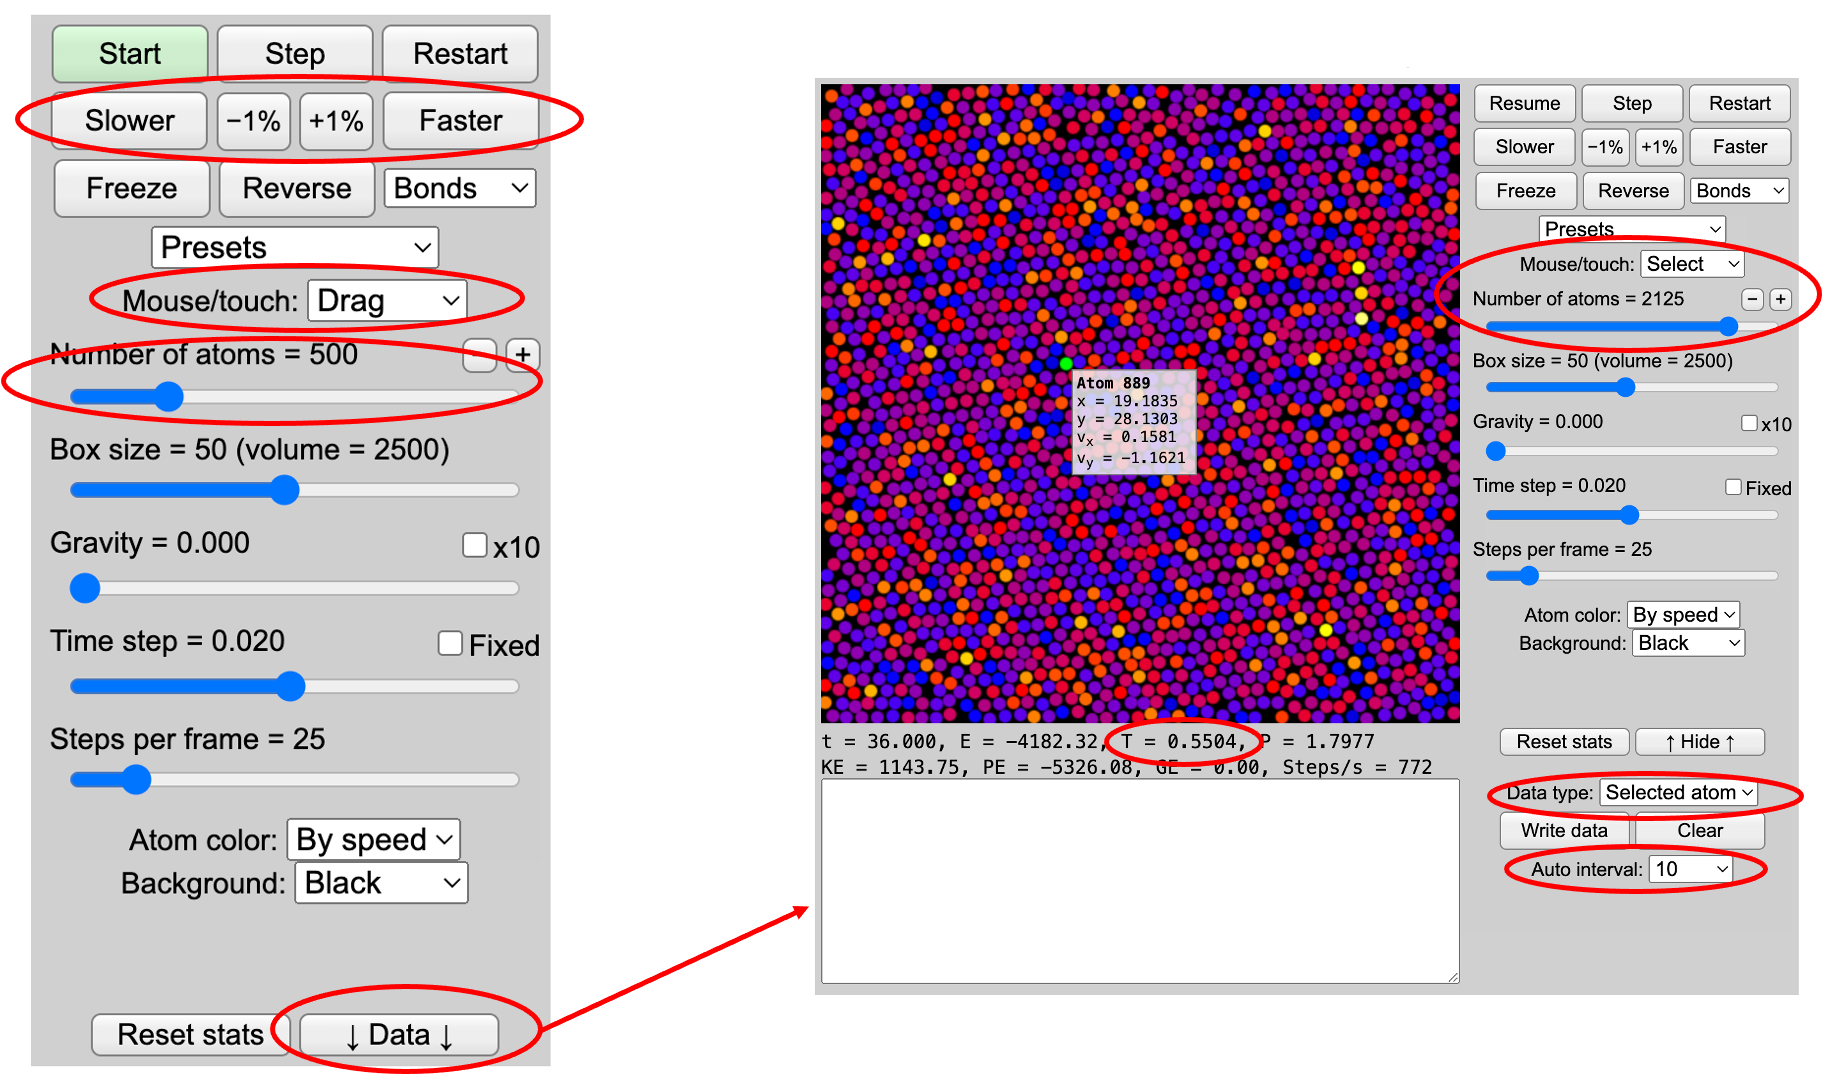

Once you have everything set up, you're ready to collect data! Click the "Reset stats" button, and then "Resume" – data should begin writing out in the box automatically.

As another note to speed things up, your computer should easily be able to handle running multiple of these at once. Go ahead and feel free to set things up in multiple browser windows (if you use tabs, it will pause or slow the simulation substantially when that tab is not in focus) to collect data simulataneously.

Collect ten trajectories of a duration of at least 3000 time units and enter them in the boxes that appear when you evaluate the cells below. A few notes:
* It's a good idea to select a different atom each time
* Keep an eye on the temperature! It will drift up over time and you should adjust downwards between data collection runs if necessary (don't do it during data collection!)
* It's easiest to keep track of things if you "Reset stats" between each run, but if you forget, just make sure your total duration (final timestamp minus initial) is at least 3000; the data processing code below will handle things just fine.


<div class="alert alert-block alert-warning">
<b>🚨 Preserving data 🚨</b>
    
I strongly suggest also pasting your data into a local document on your machine. If you accidentally leave or refresh this page, you will lose data you have already entered!
</div>

Paste in your first trajectory below – this should be the FULL contents of the box with the data in it, including the headers! Make sure that the quotation marks don't get replaced, so your data should end up between them, replacing ONLY the text itself. After you paste the data, evaluate the cell as you did above.

NOTE: the data will be a very large block of text that might make scrolling in the notebook annoying; you can click the little blue bar to the left of the cell while your cursor is in it to collapse the display down to a manageable size. I found it easier to do this to all the cells after evaluating all of them.

In [ ]:
data01 = CSV.read(IOBuffer("replace this text with your data"), DataFrame);

Second trajectory goes here:

In [ ]:
data02 = CSV.read(IOBuffer("replace this text with your data"), DataFrame);

And the third one:

In [ ]:
data03 = CSV.read(IOBuffer("replace this text with your data"), DataFrame);

You get the idea...

In [ ]:
data04 = CSV.read(IOBuffer("replace this text with your data"), DataFrame);

In [ ]:
data05 = CSV.read(IOBuffer("replace this text with your data"), DataFrame);

In [ ]:
data06 = CSV.read(IOBuffer("replace this text with your data"), DataFrame);

In [ ]:
data07 = CSV.read(IOBuffer("replace this text with your data"), DataFrame);

In [ ]:
data08 = CSV.read(IOBuffer("replace this text with your data"), DataFrame);

In [ ]:
data09 = CSV.read(IOBuffer("replace this text with your data"), DataFrame);

In [ ]:
data10 = CSV.read(IOBuffer("replace this text with your data"), DataFrame);

Run the cell below to define the function that will process the text you pasted in into a format we can work with.

In [ ]:
function process_raw_data(df)
    # calculate squared displacement
    df[:, :dsq] .= (df[:, :x].-df[1, :x]).^2 .+ (df[:, :y].-df[1,:y]).^2; 

    # round time values and uniformize start to be 0 to make later handling easier
    df[:, :t] .= df[:, :t] .- df[1,:t];
    df[:, :t] .= round.(df[:, :t], digits=0)
    
    # drop columns we don't need
    select!(df, [:t, :dsq]);
    
    return df
end

Now we can read in each of the datasets using that function...

In [ ]:
dfs = process_raw_data.([data01, data02, data03, data04, data05, data06, data07, data08, data09, data10]);

...and visualize the squared displacement of each atom over time in a plot:

In [ ]:
f = Figure()
ax = Axis(f[1, 1],
    xlabel = "Time",
    ylabel = "Squared Displacement (SD)",
)

lines!(ax, dfs[1][:, :t], dfs[1][:, :dsq], label="atom 1")

for (i, df) in enumerate(dfs[2:end])
    lines!(ax, df[:, :t], df[:, :dsq], label="atom "*string(i+1))
end

axislegend()
f

<div class="alert alert-block alert-success">
<b>💡 Lab memo prompt:</b> Inspect this plot and make some qualitative observations. Can you identify features in the plot that might correspond with aspects you observed while watching the simulation run? How does your plot compare to others'?
</div>

To estimate $D$, we'll take the average over all the trajectories and fit a line to that data...

In [ ]:
# trim to length and combine in one array
min_steps = min([size(df,1) for df in dfs]...)
tvals_singleatoms = dfs[1].t[1:min_steps]
dsq_mat = zeros(min_steps, length(dfs))
for (i,df) in enumerate(dfs)
    num_steps = size(df, 1)
    if num_steps > min_steps
        delete!(df, min_steps+1:num_steps)
    end
    dsq_mat[:, i] = df.dsq
end

# find line of best fit (we will force it to go through origin because we know MSD should be 0 at t=0)
msd_singleatoms = mean(dsq_mat, dims=2)[:,1]
D_singleatoms = (tvals_singleatoms'*msd_singleatoms)[1,1]/(4*(tvals_singleatoms'*tvals_singleatoms))

f = Figure()
ax = Axis(f[1, 1],
    xlabel = "Time",
    ylabel = "Mean Squared Displacement (MSD)",
)

lines!(ax, tvals_singleatoms, msd_singleatoms, label="MSD data")
lines!(ax, tvals_singleatoms, tvals_singleatoms .* 4D_singleatoms, color=:black, label="line of best fit, D="*string(round(D_singleatoms, digits=6)))
axislegend(position=:rb)
f

Okay, so we have our first estimate of a nondimensional diffusivity! 
<div class="alert alert-block alert-success">
<b>💡 Lab memo prompt:</b> Take note of your number and compare with some of the other people in the lab session. How much variation is there? What causes this variation?
</div>

## Approach 2: Few snapshots of ALL the particles
The MD engine also allows us to collect data in the form of snapshots of the locations of ALL particles. Let's try that now. We'll do just one simulation, again for about 3000 timesteps, and collect just four snapshots: One at the start, and one every 1000 timesteps. To set this up, you'll just need to:
* Change "Data type" to "All atoms"
* Reset stats, and then manually click "Write data" to get your first snapshot. Paste that into the first box below. Again, include ALL the contents of the box!
* Run the simulation for about 1000 timesteps, pause, write the data, copy and paste into next box, and continue twice more. Make sure you note the $t$ value each time you pause and modify the numbers in the intervening cells!
* Be sure to evaluate all the cells!

In [ ]:
t0 = 0.0 # you can change this if your first snapshot wasn't at the zero timestamp

In [ ]:
snapshot0 = CSV.read(IOBuffer("replace this text with your data"), DataFrame, header=7)[!, ["x       ","y       "]];
rename!(snapshot0, [:x, :y]);
snapshot0.num = 1:size(snapshot0,1);

In [ ]:
t1 = 1000.0 # change this number to your actual second timestamp

In [ ]:
snapshot1 = CSV.read(IOBuffer("replace this text with your data"), DataFrame, header=7)[!, ["x       ","y       "]];
rename!(snapshot1, [:x, :y]);
snapshot1.num = 1:size(snapshot1,1);

In [ ]:
t2 = 2000.0 # update this one too

In [ ]:
snapshot2 = CSV.read(IOBuffer("replace this text with your data"), DataFrame, header=7)[!, ["x       ","y       "]];
rename!(snapshot2, [:x, :y]);
snapshot2.num = 1:size(snapshot2,1);

In [ ]:
t3 = 3000.0 # don't forget me!

In [ ]:
snapshot3 = CSV.read(IOBuffer("replace this text with your data"), DataFrame, header=7)[!, ["x       ","y       "]];
rename!(snapshot3, [:x, :y]);
snapshot3.num = 1:size(snapshot3,1);

Now process some things again...

In [ ]:
n_atoms = size(snapshot0, 1)
snapshots = [snapshot0, snapshot1, snapshot2, snapshot3]
tvals_allatoms = [t0, t1, t2, t3] .- t0;

In [ ]:
dsq = zeros(Float64, length(snapshots), n_atoms);

for (i, sdf) in enumerate(snapshots)
    d = sdf .- sdfs[1]
    dsq[i, :] .= d.x .^2 + d.y .^2
end

msd_allatoms = mean(dsq, dims=2)[:,1];
D_allatoms = inv(tvals_allatoms'*tvals_allatoms)*(tvals_allatoms'*msd_allatoms)[1,1]/4

f = Figure()
ax = Axis(f[1, 1],
    xlabel = "Time",
    ylabel = "Mean Squared Displacement (MSD)",
)

scatter!(ax, tvals_allatoms, msd_allatoms, label="MSD from snapshots")
lines!(tvals_allatoms, tvals_allatoms .* 4D_allatoms, color=:black, label="line of best fit, D="*string(round(D_allatoms, digits=6)))

axislegend(position=:rb)
f

<div class="alert alert-block alert-success">
<b>💡 Lab memo prompt:</b> How different is this value from the one you obtained above? What do you think the source of this difference might be?
</div>

We can visualize this average and best-fit line overlaid onto *all* of the data (i.e. squared displacement of each atom at each of the four timepoints) as well...

In [ ]:
# a mysterious color function to be discussed more later...
f = Figure()
ax = Axis(f[1, 1],
    xlabel = "Time",
    ylabel = "(M)SD",
)

lines!(ax, tvals_allatoms, dsq[:,1], alpha=0.05)
for i in 2:n_atoms
    lines!(ax, tvals_allatoms, dsq[:,i], alpha=0.05)
end

scatter!(ax, tvals_allatoms, msd_allatoms, label="MSD from snapshots")
lines!(ax, tvals_allatoms, tvals_allatoms .* 4D_allatoms, color=:black, label="line of best fit, D="*string(round(D_allatoms, digits=6)))
f

That's a huge range of behaviors! I wonder if we can explain it somehow...

In [ ]:
# function to compute initial distance from wall of each particle
wall_dist(i) = round(Int, minimum(25 .- abs.([sdfs[1][i, :x], sdfs[1][i, :y]] .- 25)))+1
dists = [wall_dist(i) for i in 1:n_atoms];

# bin things out based on distance (cutoffs should start with 0)
distance_bin(i; cutoffs=[0, 4, 9]) = sum(wall_dist(i) .> cutoffs)
labels = ["very close", "kinda close", "medium/far"] # one for each cutoff

# split indices by bin (there's almost certainly a smarter way to do this)
bins = distance_bin.(1:n_atoms);
n_bins = maximum(bins)
inds_bins = [[j for j in 1:n_atoms if bins[j]==i] for i in 1:n_bins]

# get averages within each bin...there's probably a smarter way to do this too
msd_binned = zeros(Float64, length(snapshots), n_bins);

for i in 1:length(snapshots)
    dsq_here = dsq[i,:]
    for j in 1:n_bins
        msd_binned[i,j] = mean(dsq_here[inds_bins[j]])
    end
end

In [ ]:
# plot averages per distance bin
colors = cgrad(:redsblues, n_bins, rev=true, categorical=true)#, scale=:log)

f = Figure()
ax = Axis(f[1, 1],
    xlabel = "Time",
    ylabel = "(M)SD",
)

lines!(ax, tvals_allatoms, msd_binned[:, 1], label=labels[1], color=colors[1], linewidth=2)
for i in 2:n_bins
    lines!(ax, tvals_allatoms, msd_binned[:, i], label=labels[i], color=colors[i], linewidth=2)
end

scatter!(ax, tvals_allatoms, msd_allatoms, label="snapshot averages")
lines!(ax, tvals_allatoms, tvals_allatoms .* 4D_allatoms, color=:black, linestyle=:dash, label="line of best fit, D="*string(round(D_allatoms, digits=6)))

axislegend(position=:lt)
f

This plot shows both the overall averages and line of best fit from above as well as the averages within each distance bin, that is, how close the particles start to the wall.

<div class="alert alert-block alert-success">
<b>💡 Lab memo prompt:</b> What do you notice when we visualize the data this way? How could the plot above help explain the one before?
</div>

## But is this the same diffusion constant?

The way we usually think about diffusivity (and the way we will mostly discuss it in lecture) is as a way to quantify how quickly material "spreads out" over time in a continuum setting. We can examine that in this atomistic context as well, by considering the population of atoms that starts in the "middle strip" of the box, and watching how they spread out during the simulation...

In [ ]:
# collect the list of indices of the particles that start in the middle strip
df = sdfs[1]
nums = df[(23.5 .< df.x .< 26.5), :].num;

In [ ]:
function concentration_profile(df, nums; slice_size=1.0, box_size=50.0)
    bins = 0.0:slice_size:box_size
    counts = zeros(Int, length(bins)-1)
    df_here = filter(row -> row.num in nums, df)
    for i in 1:length(bins)-1
        counts[i] = size(df_here[(bins[i] .< df_here.x .< bins[i+1]), :], 1)
    end
    return 0.5 * (bins[1:end-1] .+ bins[2:end]), counts ./ (box_size*slice_size)
end

In [ ]:
f = Figure()
ax = Axis(f[1, 1],
    xlabel = "x",
    ylabel = "Concentration",
)

profs = concentration_profile.(sdfs, Ref(nums))
lines!(ax, profs[1]..., label="t="*string(tvals_allatoms[1]))
lines!(ax, profs[2]..., label="t="*string(tvals_allatoms[2]))
lines!(ax, profs[3]..., label="t="*string(tvals_allatoms[3]))
lines!(ax, profs[4]..., label="t="*string(tvals_allatoms[4]))

axislegend()
f

Okay, now hold that thought...
# Continuum-Scale Diffusion: Fick's Laws
For constant diffusivity $D$, the 1D diffusion equation reads
$$\frac{\partial c}{\partial t} = D\frac{\partial^2c}{\partial x^2}$$

which for a point release of total mass $M$ at the origin at $t=0$ has the solution

$$c(x,t) = \frac{M}{\sqrt{4\pi Dt}}\exp\left(-\frac{x^2}{4Dt}\right)$$

(If you've taken 21-259, you can verify that this $c(x,t)$ indeed satisfies the partial differential equation (PDE) above; if you've taken 21-260, you might even be able to solve the PDE to get this solution! Whether or not you've taken either of these classes, you should think about how good the "point release" assumption is for our case here...)

In the cell below, modify the $D$ value at the top as needed to get the best fit you think you can between your model and your measured data across all four snapshots.

In [ ]:
# SET D VALUE IN THE NEXT LINE, LEAVE REST OF CELL ALONE
D = 0.001

f = Figure(size=(1000, 300))
ax1 = Axis(f[1, 1],
    xlabel = "x",
    ylabel = "Concentration",
    limits = (0, 50, 0, 1),
    title = "snapshot 1"
)
ax2 = Axis(f[1, 2],
    xlabel = "x",
    ylabel = "Concentration",
    limits = (0, 50, 0, 1),
    title = "snapshot 2"
)
ax3 = Axis(f[1, 3],
    xlabel = "x",
    ylabel = "Concentration",
    limits = (0, 50, 0, 1),
    title = "snapshot 3"
)
ax4 = Axis(f[1, 4],
    xlabel = "x",
    ylabel = "Concentration",
    limits = (0, 50, 0, 1),
    title = "snapshot 4"
)

xvals = collect(0:50)
t_offset = 700 # fudge factor to avoid making it try to plot the delta spike at t=0
conc(x,t,D) = 2*exp(-(x-25)^2/(4*D*(t+t_offset))) /sqrt(4*pi*D*(t+t_offset))

axs = [ax1, ax2, ax3, ax4]

for i in 1:4
    tval = tvals_allatoms[i] + t_offset
    c = conc.(xvals, Ref(tval), Ref(D))
    lines!(axs[i], xvals, c, label="modeled data")
    lines!(axs[i], profs[i]..., label="measured data")
end

axislegend()
f

<div class="alert alert-block alert-success">
<b>💡 Lab memo prompt:</b> Which $D$ value seems to fit the data best this way? The one from the individual trajectories? The one from the snapshots? Or some other value? Include images of each timestep for what you visually assess to be the best-fitting value in your report.
</div>